## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
bike_df = pd.read_csv("https://raw.githubusercontent.com/abhinavforanalytics/bike_sharing_assignment/main/day.csv")

In [3]:
bike_df.shape

(730, 16)

## Preliminary look at the dataframe for a quick review:
    - Top 5 rows
    - Statistical Description
    - Datatypes for each column

In [4]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### <u>Data summary verdict</u>:
`1. All columns except date are integers or float`<br>
`2. Date derived columns such as month etc. are more suitable as categories.`

------------------------------------------------------------------------------------------------

# <u>Data Sanity Checks</u>
1. Identifying & Dropping spam columns.
2. Check missing values and find suitable imputation.

In [7]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### 1. Identifying & Dropping spam columns

In [8]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Columns - Left to right:
- <b>'instant'</b>: Is an Index column starting at '0', hence <font color= red><b>can be dropped</b><font color= red>.
- <b>'dteday'</b>: Is a column with existing derived values in subsequent columns, hence <font color= red><b>can be dropped</b><font color= red>.
- <b>'weathersit','temp','atemp','hum','windspeed'</b>: Seem relevant to the current analysis, hence <font color= green><b>retained</b><font color= green>.
- <b>'casual','registered'</b>: Are summation of 'cnt' column which is our dependent variable, hence they both <font color= red><b>can be dropped</b><font color= red>.

In [9]:
##Dropping the above mentioned columns
bike_df.drop(columns=['instant', 'dteday', 'casual', 'registered'],axis=1,inplace=True)

<AxesSubplot:>

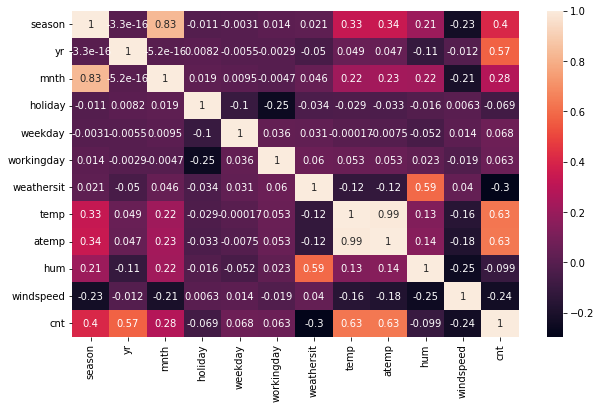

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(bike_df.corr(),annot=True)

#### 2. Check missing values and finding suitable imputation.

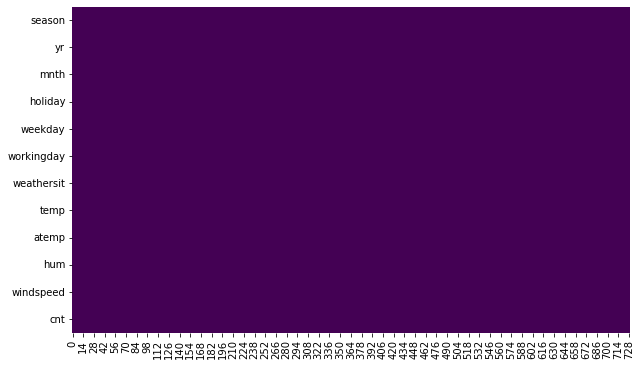

In [11]:
## Visualizing the null values
plt.figure(figsize=(10,6))
sns.heatmap(bike_df.isna().transpose(),
            cmap="viridis",cbar=False)
plt.show()

<b>`No null values found which qualifies the data for further quality checks`</b>

#### Check duplicates & Outliers

## <u>Data type reassignment</u>

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## <u>Creating dummy variables using pandas library</u>
(Using the `pd.getdummies()` method)

In [13]:
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [15]:
bike_df_new = pd.get_dummies(bike_df, drop_first=True)

In [16]:
bike_df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## EDA
- Categorical Variables
- Numeric variables
- Together

In [17]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [18]:
bike_df_num = bike_df[['temp', 'atemp', 'hum', 'windspeed','cnt']]
bike_df_cat = bike_df[['season','mnth','weathersit','holiday','weekday','workingday','cnt']]

## Categorical Variables

In [19]:
columns = ['season', 'mnth', 'weathersit', 'holiday', 'weekday', 'workingday']

In [20]:
for i in range(len(columns)):
    new_cat = bike_df_cat.groupby(columns[i]).sum()['cnt']/bike_df_cat['cnt'].sum()
    print(new_cat.map('{:.2%}'.format))

season
1    14.27%
2    27.91%
3    32.24%
4    25.57%
Name: cnt, dtype: object
mnth
1      4.10%
2      4.54%
3      6.96%
4      8.18%
5     10.08%
6     10.52%
7     10.48%
8     10.67%
9     10.51%
10     9.80%
11     7.74%
12     6.41%
Name: cnt, dtype: object
weathersit
1    68.61%
2    30.24%
3     1.15%
Name: cnt, dtype: object
holiday
0    97.62%
1     2.38%
Name: cnt, dtype: object
weekday
0    13.49%
1    13.84%
2    14.25%
3    14.32%
4    14.75%
5    14.82%
6    14.52%
Name: cnt, dtype: object
workingday
0    30.40%
1    69.60%
Name: cnt, dtype: object


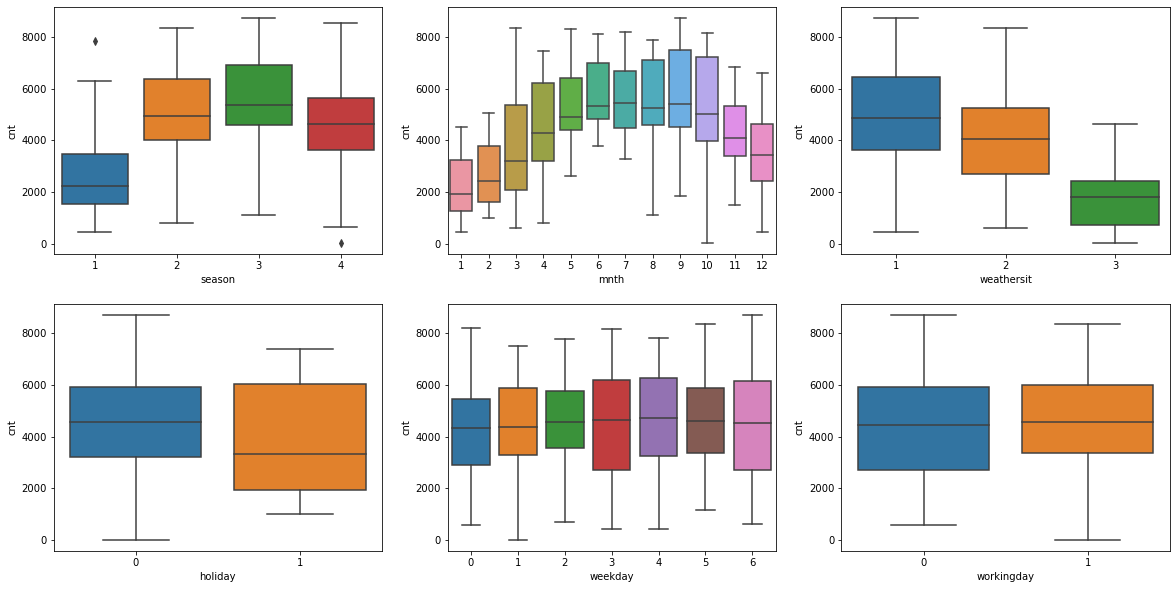

In [21]:
plt.figure(figsize=(20, 10))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = columns[i], y = 'cnt', data = bike_df_cat)

plt.show()

## Inferences:
- <b>'season'</b>: The majority of sales are happening around season 3, around <b>32%</b>.
- <b>'mnth'</b>: Sales embark on a <b>growth trajectory from May that stays put until Aug</b> till it starts slowly declining hence after.
- <b>'weathersit'</b>: <b>68.61%</b> of bookings happened in the'Clear, Few clouds, Partly cloudy, Partly cloudy' weather.
- <b>'holiday'</b>: <b>97%</b> of bookings happened when there wasn't a holiday, this clearly introduces skew in the data.
- <b>'weekday'</b>: The sales are evenly distribute among the weekdays, however, with a slight <b>uptick on 5th day of the week.</b>
- <b>'workingday'</b>: 70% of sales happened on a working day. Which denotes a good influence on the independent variable.

## Numeric Variables

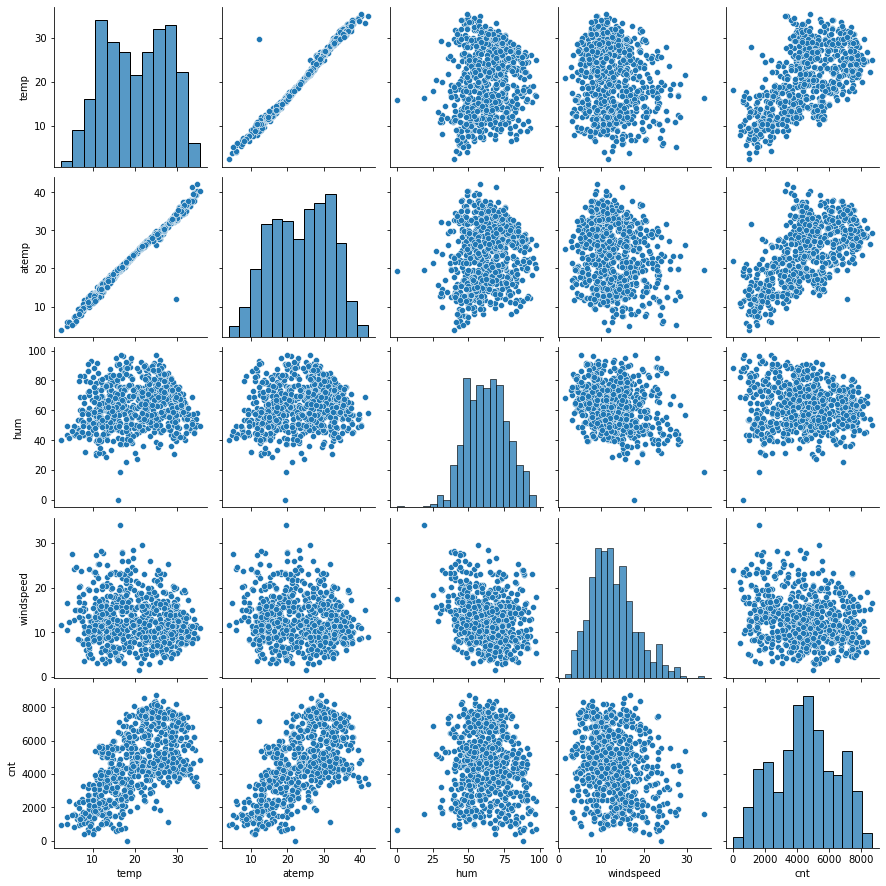

In [22]:
##Using Pairplot to see overall summary of info
## Only considering the numeric values since non-numeric values will cost the runtime
sns.pairplot(bike_df_num)

1. `cnt is found linearly related to atemp and temp column fields`<br>
2. `atemp and temp have a linear correlation too, since they're both temperature units on same scale`

## Together

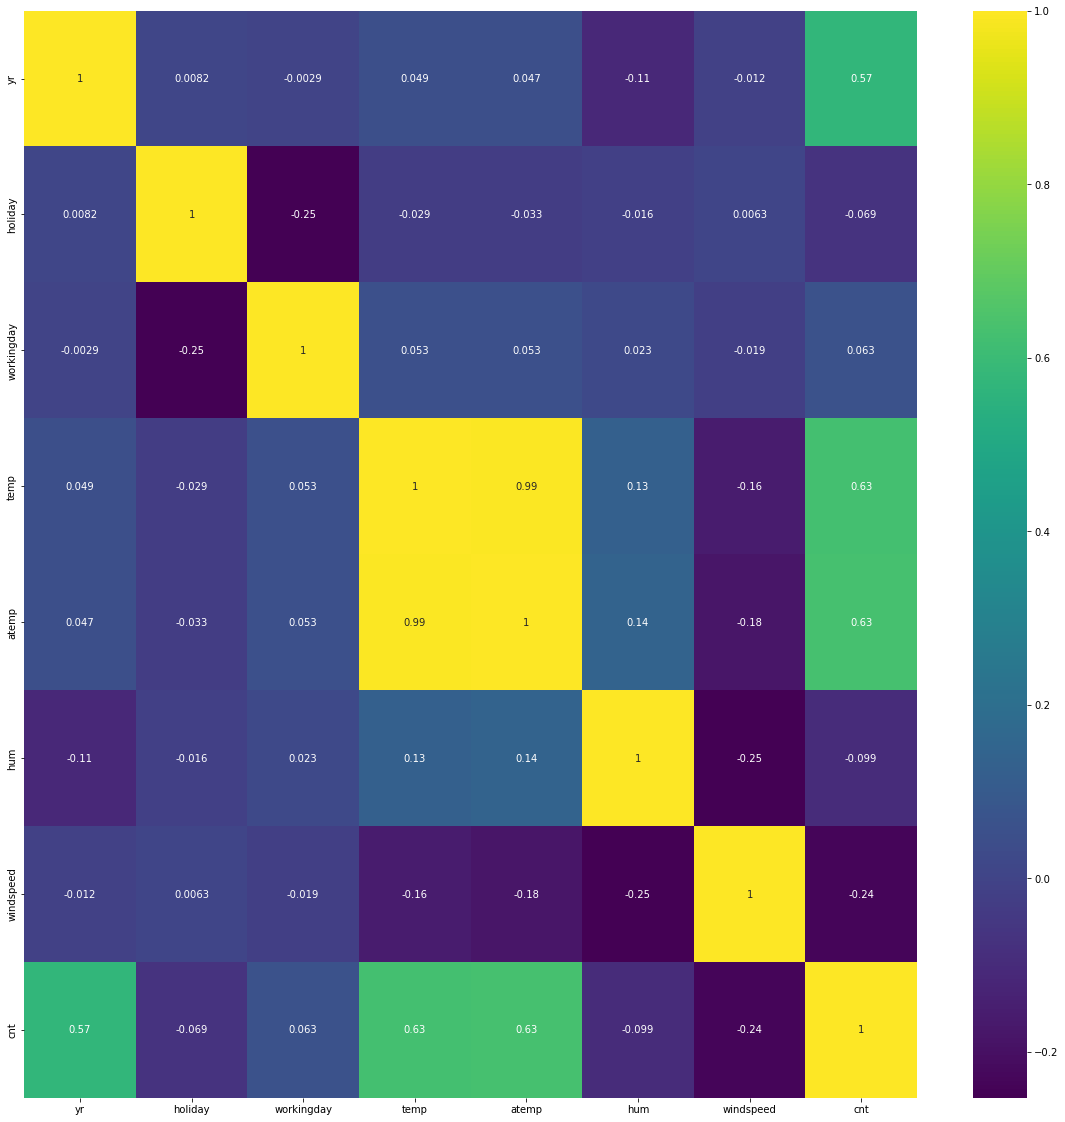

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(bike_df.corr(),annot=True,cmap='viridis')
plt.show()

------------------------------------------------------------------------------------------------

# Preparing model

In [24]:
from sklearn.model_selection import train_test_split #spilling the dataset in test and training parts
from sklearn.preprocessing import MinMaxScaler #scaling the variables
from sklearn.feature_selection import RFE #Feature elimination & selection
from sklearn.linear_model import LinearRegression #linear model
from sklearn.metrics import r2_score #evaluating the model
import statsmodels.api as sm #linear model for statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor# Check for the VIF values of the feature variables. 

- ### Splitting the Data in Train and Test datasets

In [25]:
df_train,df_test = train_test_split(bike_df_new,train_size=0.7,random_state=100)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [27]:
#verify % of the training set is 70% as defined
df_train.shape[0]/bike_df_new.shape[0]

0.6986301369863014

In [28]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0


- ## Rescaling the variables

In [29]:
##(x-xmin)-(xmax-xmin) for MinMaxScaler, using this formula, entire data is compressed between zero and 1
##Min max takes care of the outliers - Data points who are off, no data points goes beyond 1 in that case
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the dummy variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


- ## Building a model

In [31]:
y_train = df_train.pop('cnt') #taking out dependent variable
X_train = df_train

In [32]:
##Model Building
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE with the output number of the variable equal to 10
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 16),
 ('weekday_2', False, 17),
 ('weekday_3', False, 19),
 ('weekday_4', False, 20),
 ('weekday_5', False, 18),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [33]:
X_train.columns[~rfe.support_] ##See which columns RFE did not support

Index(['workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2'],
      dtype='object')

In [34]:
X_train.columns[rfe.support_]##See which columns RFE did support

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

## Building a new model based on RFE support and 'statsmodel' library

In [35]:
col = X_train.columns[rfe.support_] ## RFE Supported columns
X_train_rfe = X_train[col]

In [36]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0


In [37]:
X_train_rfe = sm.add_constant(X_train_rfe) ## Adding a constant

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0


# Why VIF of 5 is significant?

 <b>5 = 1/(1-r2)</b> ##VIF Formula <br>
=><b> r2 = 0.8 </b>-- Which is very high

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_rfe = X_train_rfe.drop(['const'],axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,season_2,1.82
6,season_4,1.73
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


- ### Iteration #1 (First model based on VIF over RFE support columns)

In [40]:
X_train_rfe = X_train_rfe.drop('hum',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.39e-171
Time:                        18:47:45   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.017      5.181      0.000       0.056       0.124
yr               0.2332      0.009     26.169      0.000       0.216       0.251
holiday         -0.0848      0.028     -3.005      0.003      -0.140      -0.029
temp             0.5464      0.023     23.262      0.000       0.500       0.593
windspeed       -0.1427      0.027     -5.252      0.000      -0.196      -0.089
season_2         0.0905      0.012      7.588      0.000       0.067       0.114
season_4         0.1316      0.012     11.430      0.000       0.109       0.154
mnth_8           0.0394      0.018      2.196      0.029       0.004       0.075
mnth_9           0.1002      0.018      5.650      0.000       0.065       0.135
weathersit_3    -0.2520      0.027     -9.483      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       63.117   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.174
Skew:                          -0.757   Prob(JB):                     7.23e-25
Kurtosis:                       4.714   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
##Checking the VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.79
6,mnth_8,1.57
5,season_4,1.44
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


- ### Iteration #2 isn't required

In [42]:
X_train_lm = sm.add_constant(X_train_rfe)
# Create a final model
lm = sm.OLS(y_train, X_train_lm).fit()

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.39e-171
Time:                        18:47:45   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.017      5.181      0.000       0.056       0.124
yr               0.2332      0.009     26.169      0.000       0.216       0.251
holiday         -0.0848      0.028     -3.005      0.003      -0.140      -0.029
temp             0.5464      0.023     23.262      0.000       0.500       0.593
windspeed       -0.1427      0.027     -5.252      0.000      -0.196      -0.089
season_2         0.0905      0.012      7.588      0.000       0.067       0.114
season_4         0.1316      0.012     11.430      0.000       0.109       0.154
mnth_8           0.0394      0.018      2.196      0.029       0.004       0.075
mnth_9           0.1002      0.018      5.650      0.000       0.065       0.135
weathersit_3    -0.2520      0.027     -9.483      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       63.117   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.174
Skew:                          -0.757   Prob(JB):                     7.23e-25
Kurtosis:                       4.714   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = 'green'>Final model seems good to go with lesser multicollinearity<font color = 'green'>

In [44]:
X_train_lm = sm.add_constant(X_train_rfe)

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
## Residual Analysis
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 6.79999999999999, 'Errors')

<Figure size 432x288 with 0 Axes>

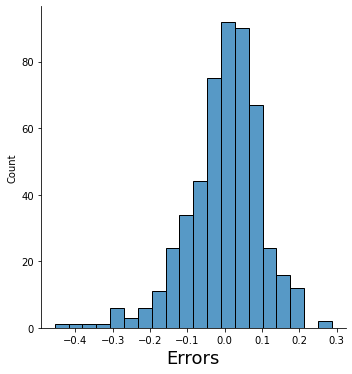

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Residuals are normally distributed. Hence our assumption for Linear Regression is True.

## Checking for homoscedasticity

In [47]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

In [48]:
#The test
white_test = het_white(lm.resid,  lm.model.exog)
#Zipping the array with labels
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,white_test)

[('Lagrange multiplier statistic', 76.49482984100396),
 ('p-value', 0.0003122313911053202),
 ('f-value', 2.126527740235847),
 ('f p-value', 0.00014447063265748825)]

Based on the p-value which is <=0.05, we can conclusively say that <b>error terms are Heteroscedastic</b>

## Making Predictions
 - Applying the scaling on the test sets

In [49]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [50]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
# Making Predictions
y_pred = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

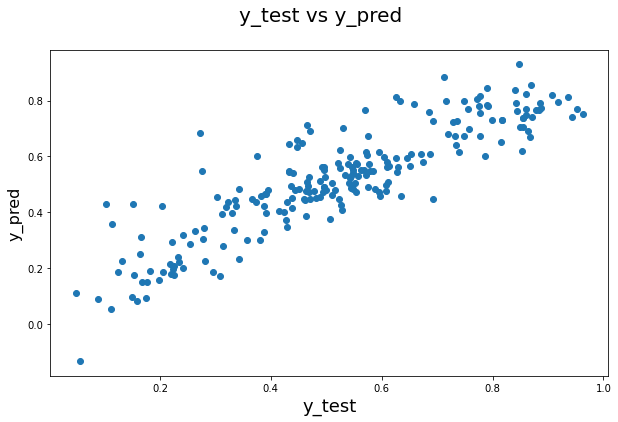

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

`y_test and y_pred seem to have a nice linear regression`

In [53]:
print("Test R2 Score: ",r2_score(y_test, y_pred),"|","Train R2 Score: ",r2_score(y_train, y_train_cnt))

Test R2 Score:  0.7731388699761521 | Train R2 Score:  0.8056780165818268


#### Both r2 score for models seem decent enough to use

In [54]:
lm.params

const           0.090030
yr              0.233233
holiday        -0.084826
temp            0.546436
windspeed      -0.142707
season_2        0.090521
season_4        0.131612
mnth_8          0.039352
mnth_9          0.100173
weathersit_3   -0.251998
dtype: float64

In [55]:
pd.DataFrame(lm.params).sort_values(by=0,ascending=False)

,0
temp,0.546436
yr,0.233233
season_4,0.131612
mnth_9,0.100173
season_2,0.090521
const,0.090030
mnth_8,0.039352
holiday,-0.084826
windspeed,-0.142707
weathersit_3,-0.251998


## Verdict

Based on the model, different variables have different impact on the sales of bikes, some more than the others.

- yr: The coefficient for this variable is 0.233233. This means that as the year increases by one unit, the dependent variable (unit sales of bike) increases by 0.233233 units.
- holiday: The coefficient for this variable is -0.084826. This means that on holidays, the dependent variable decreases by 0.084826 units, all else equal.
- temp: The coefficient for this variable is 0.546436. This means that as temperature increases by one unit, the dependent variable increases by 0.546436 units.
- windspeed: The coefficient for this variable is -0.142707. This means that as windspeed increases by one unit, the dependent variable decreases by 0.142707 units.
- season_2: The coefficient for this variable is 0.090521. This means that in season 2, the dependent variable increases by 0.090521 units compared to other seasons, all else equal.
- season_4: The coefficient for this variable is 0.131612. This means that in season 4, the dependent variable increases by 0.131612 units compared to other seasons, all else equal.
- mnth_8: The coefficient for this variable is 0.039352. This means that in August, the dependent variable increases by 0.039352 units compared to other months, all else equal.
- mnth_9: The coefficient for this variable is 0.100173. This means that in September, the dependent variable increases by 0.100173 units compared to other months, all else equal.
- weathersit_3: The coefficient for this variable is -0.251998. This means that in bad weather (weathersit_3), the dependent variable decreases by 0.251998 units compared to good weather (weathersit_1), all else equal.